## Linear Regression

### Data Preprocessing Steps

In [1]:
# Importing all the libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading the csv file

df = pd.read_csv("data _Full.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# To check the missing values

df[df.isnull()].count()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

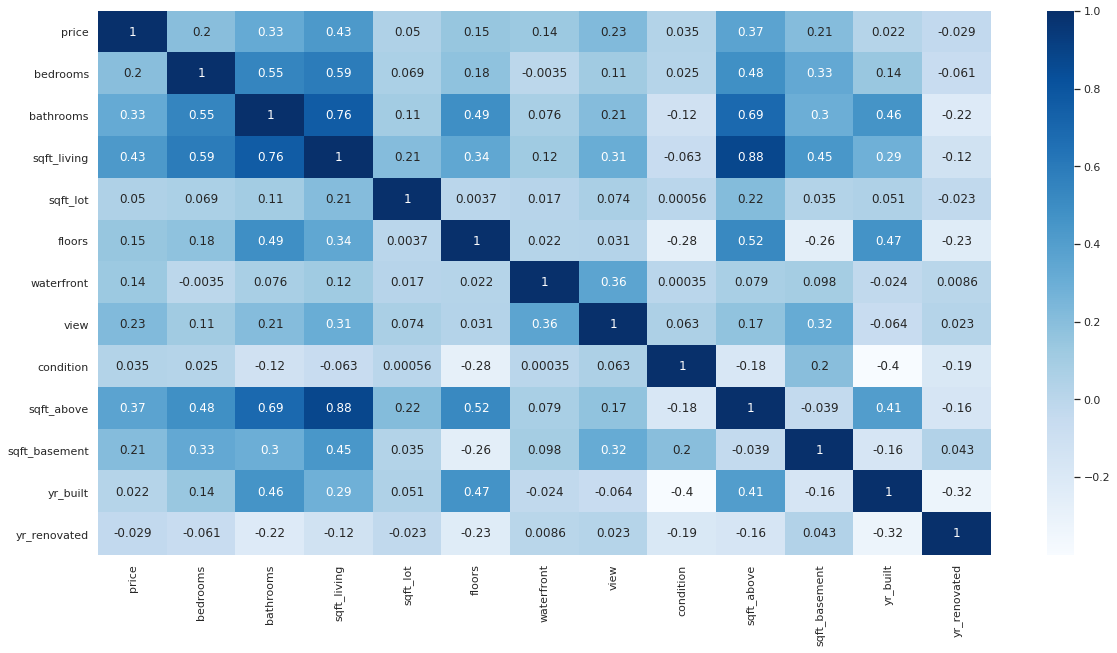

In [5]:
#checking all the columns through boxPlot

sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [6]:
#Counting the country column values

df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [7]:
#Counting the waterfront column values

df.waterfront.value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

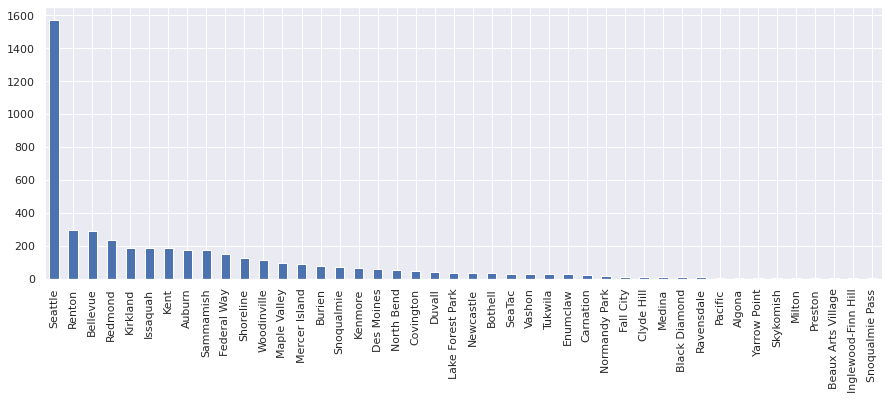

In [8]:
#Counting the maximum number of row in city column with plot bar

plt.figure(figsize=(15,5))
df.city.value_counts().plot.bar()
plt.show()

In [9]:
#As we have the highest city as "Seattle", so we kept only the data with seattle now, rest we dropped the rows

df = df[df['city'] == 'Seattle']

#Now we can see our shape changed 
df.shape

(1573, 18)

In [10]:
#Here we are droping all the columns with are uncessary as provided above

df.drop(['country','city','street','date','waterfront'],axis = 1,inplace=True)

In [11]:
#The dataframe now looks like this

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,2384000.0,5.0,2.5,3650,9050,2.0,4,5,3370,280,1921,0,WA 98119
5,490000.0,2.0,1.0,880,6380,1.0,0,3,880,0,1938,1994,WA 98115
9,640000.0,4.0,2.0,1520,6200,1.5,0,3,1520,0,1945,2010,WA 98115
11,1400000.0,4.0,2.5,2920,4000,1.5,0,5,1910,1010,1909,1988,WA 98105
13,365000.0,3.0,1.0,1090,6435,1.0,0,4,1090,0,1955,2009,WA 98106


In [12]:
#Counting the waterfront column values

df.statezip.value_counts()

WA 98103    148
WA 98117    132
WA 98115    130
WA 98125     89
WA 98144     80
WA 98118     79
WA 98126     78
WA 98112     69
WA 98199     68
WA 98106     66
WA 98122     66
WA 98116     65
WA 98107     58
WA 98136     57
WA 98105     49
WA 98119     49
WA 98133     48
WA 98108     46
WA 98146     45
WA 98178     45
WA 98109     30
WA 98177     27
WA 98168     25
WA 98102     23
WA 98148      1
Name: statezip, dtype: int64

In [13]:
#Using LabelEcoder to fit statezip column

le = LabelEncoder()
df['statezip'] = le.fit_transform(df['statezip'])

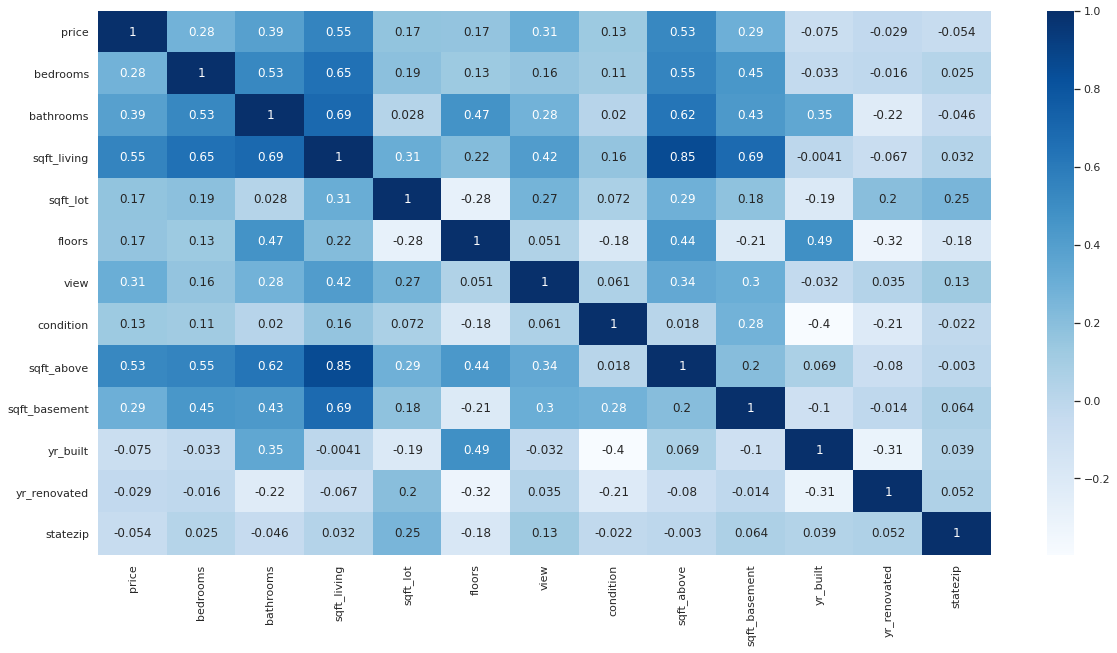

In [14]:
#checking all the columns through boxPlot

sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

### Handling Outliers here -

In [15]:
#Here, we are handling outliers

#Here, we are removing the outliers of price
#median = df['price'].median()
#std = df['price'].std()
#outliers = (df['price'] - median).abs() > std
#df[outliers] = np.nan
#df = df.dropna()
#df = df.reset_index(drop=True)

<AxesSubplot:>

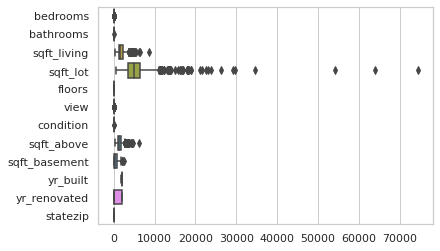

In [16]:
# To check the outliers of dependent variable we are making boxplot 

sns.set_theme(style="whitegrid")
X_data = df.drop(['price'],axis = 1)
sns.boxplot(data = X_data, orient="h")

In [17]:
#Here, we are removing the outliers of sqft_lot

median = df['sqft_lot'].median()
std = df['sqft_lot'].std()
outliers = (df['sqft_lot'] - median).abs() > std
df[outliers] = np.nan
df = df.dropna()
df = df.reset_index(drop=True)

### Fitting our MLR model to the Training set -

In [18]:
# Here, we are disturbing our data as X and Y i.e.,(Training and Testing Data)

X = df[['sqft_living']]
Y = df[['price']]

In [19]:
#Implementing Liner Regression Model

model = LinearRegression()

In [20]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.03, random_state=1)

In [21]:
# Fitting the model

model.fit(X_train, y_train)

LinearRegression()

### Prediction of Test set results -

In [22]:
#Prediciting the values

y_pred = model.predict(X_test)  
x_pred = model.predict(X_train) 

In [23]:
model.predict([[134000]])

array([[38753627.87670678]])

In [24]:
model.coef_

array([[288.86227597]])

In [25]:
model.intercept_

array([46082.8971808])

In [26]:
#coefficient * X + intercept

398.07341314 * 134000 + -256416.21564911

53085421.14511089

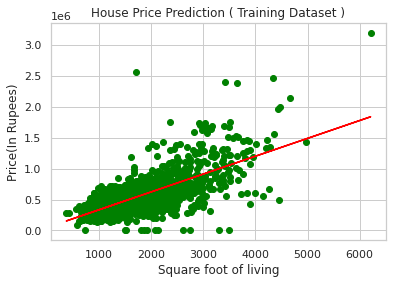

In [27]:
#Ploting the best line of Training data

plt.scatter(X_train, y_train, color="green")   
plt.plot(X_train, x_pred, color="red")    
plt.title("House Price Prediction ( Training Dataset )")  
plt.xlabel("Square foot of living")  
plt.ylabel("Price(In Rupees)")  
plt.show()   

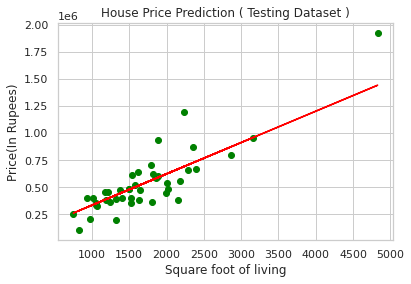

In [28]:
#Ploting the best line of Testing data

plt.scatter(X_test, y_test, color="green")   
plt.plot(X_test, y_pred, color="red")    
plt.title("House Price Prediction ( Testing Dataset )")  
plt.xlabel("Square foot of living")  
plt.ylabel("Price(In Rupees)")  
plt.show()   

In [29]:
#Checking the score

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 104299.54760107017
Mean Squared Error: 24049914614.87207
Root Mean Squared Error: 155080.3488997625
Variance score: 0.73
